In [49]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from src.analysis.corr import run_corr_analysis
from src.analysis.preprocessing import preprocessing

TICKER="PL"

df = preprocessing(target_col="c")
corr_result = run_corr_analysis(df, ticker=TICKER, days=50)

corr_result

[Errno 2] No such file or directory: 'src/data/cached/OHLC/ohlc_2025-09-15.parquet'


T
CPNG    0.672869
GSAT    0.602506
MBOT    0.602202
HOOD    0.577490
MIAX    0.568972
LIF     0.566646
WAY     0.564089
CRVL    0.555534
ALM     0.549189
SPHR    0.540181
dtype: float64

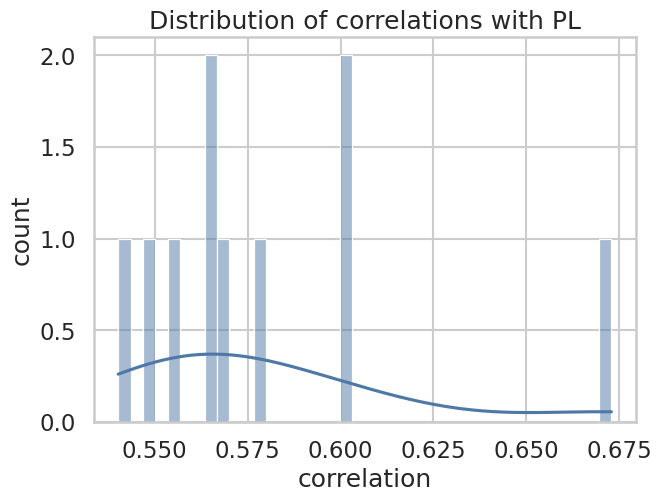

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

plt.figure(figsize=(7,5))
sns.histplot(corr_result, bins=40, kde=True, color="#4e79a7")
plt.title(f"Distribution of correlations with {TICKER}")
plt.xlabel("correlation")
plt.ylabel("count")
plt.show()

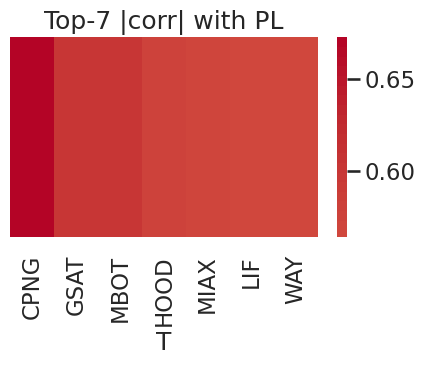

In [62]:
topK = 7
hot = corr_result.abs().sort_values(ascending=False).head(topK).sort_values(ascending=False)
plt.figure(figsize=(min(20, 0.28*len(hot)+3), 2.6))
sns.heatmap(hot.to_frame(name="corr").T, cmap="coolwarm", center=0, cbar=True)
plt.title(f"Top-{topK} |corr| with {TICKER}")
plt.yticks([])
plt.show()

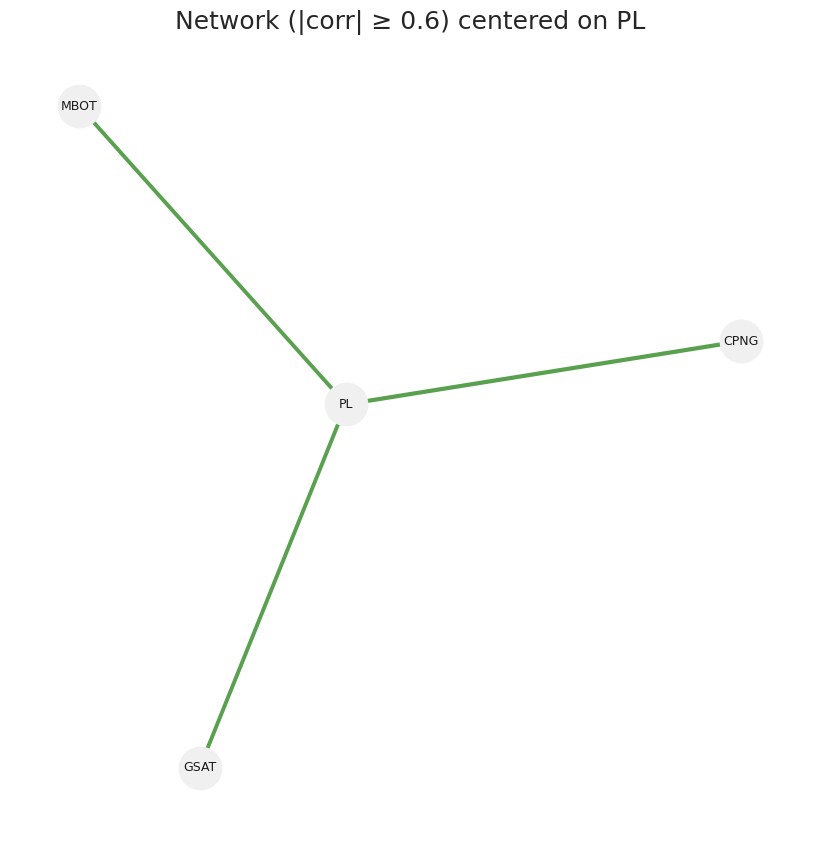

In [63]:
import networkx as nx
thr = 0.6 # 필요에 맞게 조정
sel = corr_result[corr_result.abs() >= thr]
if len(sel) > 0:
    G = nx.Graph()
    G.add_node(TICKER)
    for t, v in sel.items():
        G.add_edge(TICKER, t, weight=abs(v), sign="pos" if v>=0 else "neg")

    pos_xy = nx.spring_layout(G, seed=42)
    edge_colors = ["#59a14f" if G[u][v]["sign"]=="pos" else "#e15759" for u,v in G.edges()]
    edge_widths = [1.0 + 3.0*G[u][v]["weight"] for u,v in G.edges()]
    plt.figure(figsize=(8,8))
    nx.draw(G, pos_xy, with_labels=True, node_color="#f0f0f0",
            node_size=900, font_size=9, edge_color=edge_colors, width=edge_widths)
    plt.title(f"Network (|corr| ≥ {thr}) centered on {base}")
    plt.show()
else:
    print(f"No tickers with |corr| ≥ {thr}")